## **Libraries Installed**

In [1]:
import os
import csv
import cv2
import time
import json
import pickle
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import mediapipe as mp
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import RMSprop
from keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import EarlyStopping

## **Data Setup (Video -> CSV)**

In [3]:
# Initialize MediaPipe pose solution
mpDraw = mp.solutions.drawing_utils
mpPose = mp.solutions.pose
pose = mpPose.Pose()

# Define the input directory and output CSV file
input_directory = r'C:\Users\Renzo\Documents\Final Design\Datasets\train'
output_csv = r'C:\Users\Renzo\Documents\Final Design\train.csv'

# Function to extract keypoints from a video
def extract_keypoints(video_path, class_name):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {video_path}.")
        return []

    keypoints = []
    while True:
        success, img = cap.read()
        if not success:
            break

        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = pose.process(imgRGB)

        if results.pose_landmarks:
            frame_keypoints = []
            for lm in results.pose_landmarks.landmark:
                frame_keypoints.append((lm.x, lm.y, lm.z, lm.visibility))
            keypoints.append((frame_keypoints, class_name))
    
    cap.release()
    return keypoints

# Function to process all videos in the input directory
def process_videos(input_directory, output_csv):
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write CSV header
        header = ['video_name', 'frame_number'] + [f'{landmark}_{axis}' for landmark in range(33) for axis in ('x', 'y', 'z', 'visibility')] + ['class_name']
        writer.writerow(header)

        # Traverse through all files in the directory
        for subdir, _, files in os.walk(input_directory):
            class_name = os.path.basename(subdir)
            for file in files:
                video_path = os.path.join(subdir, file)
                if video_path.endswith(('.mp4', '.avi', '.mov')):
                    print(f"Processing video: {video_path}")
                    keypoints = extract_keypoints(video_path, class_name)
                    for frame_number, (frame_keypoints, class_name) in enumerate(keypoints):
                        row = [os.path.basename(video_path), frame_number] + [coord for kp in frame_keypoints for coord in kp] + [class_name]
                        writer.writerow(row)

# Run the processing function
process_videos(input_directory, output_csv)

Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\train\bicep_curl\bicep curl_10.mp4


c:\Users\Renzo\miniconda3\envs\pd\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\train\bicep_curl\bicep curl_14.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\train\bicep_curl\bicep curl_15.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\train\bicep_curl\bicep curl_18.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\train\bicep_curl\bicep curl_19.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\train\bicep_curl\bicep curl_21.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\train\bicep_curl\bicep curl_22.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\train\bicep_curl\bicep curl_23.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\train\bicep_curl\bicep curl_25.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\train\bicep_curl\bicep curl_26.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\train\bicep_curl\bicep curl_3.mp4
P

In [4]:
# Initialize MediaPipe pose solution
mpDraw = mp.solutions.drawing_utils
mpPose = mp.solutions.pose
pose = mpPose.Pose()

# Define the input directory and output CSV file
input_directory = r'C:\Users\Renzo\Documents\Final Design\Datasets\test'
output_csv = r'C:\Users\Renzo\Documents\Final Design\test.csv'

# Function to extract keypoints from a video
def extract_keypoints(video_path, class_name):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {video_path}.")
        return []

    keypoints = []
    while True:
        success, img = cap.read()
        if not success:
            break

        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = pose.process(imgRGB)

        if results.pose_landmarks:
            frame_keypoints = []
            for lm in results.pose_landmarks.landmark:
                frame_keypoints.append((lm.x, lm.y, lm.z, lm.visibility))
            keypoints.append((frame_keypoints, class_name))
    
    cap.release()
    return keypoints

# Function to process all videos in the input directory
def process_videos(input_directory, output_csv):
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write CSV header
        header = ['video_name', 'frame_number'] + [f'{landmark}_{axis}' for landmark in range(33) for axis in ('x', 'y', 'z', 'visibility')] + ['class_name']
        writer.writerow(header)

        # Traverse through all files in the directory
        for subdir, _, files in os.walk(input_directory):
            class_name = os.path.basename(subdir)
            for file in files:
                video_path = os.path.join(subdir, file)
                if video_path.endswith(('.mp4', '.avi', '.mov')):
                    print(f"Processing video: {video_path}")
                    keypoints = extract_keypoints(video_path, class_name)
                    for frame_number, (frame_keypoints, class_name) in enumerate(keypoints):
                        row = [os.path.basename(video_path), frame_number] + [coord for kp in frame_keypoints for coord in kp] + [class_name]
                        writer.writerow(row)

# Run the processing function
process_videos(input_directory, output_csv)

Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\test\bicep_curl\bicep curl_20.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\test\bicep_curl\bicep curl_35.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\test\bicep_curl\bicep curl_37.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\test\bicep_curl\curl2.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\test\deadlift\deadlift1.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\test\deadlift\deadlift2.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\test\deadlift\deadlift3_1.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\test\deadlift\deadlift_36.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\test\jumping_jacks\jump jacks_37.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\test\jumping_jacks\jump jacks_38.mp4
Processing video: C:\Users\Renzo

In [5]:
# Initialize MediaPipe pose solution
mpDraw = mp.solutions.drawing_utils
mpPose = mp.solutions.pose
pose = mpPose.Pose()

# Define the input directory and output CSV file
input_directory = r'C:\Users\Renzo\Documents\Final Design\Datasets\val'
output_csv = r'C:\Users\Renzo\Documents\Final Design\val.csv'

# Function to extract keypoints from a video
def extract_keypoints(video_path, class_name):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {video_path}.")
        return []

    keypoints = []
    while True:
        success, img = cap.read()
        if not success:
            break

        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = pose.process(imgRGB)

        if results.pose_landmarks:
            frame_keypoints = []
            for lm in results.pose_landmarks.landmark:
                frame_keypoints.append((lm.x, lm.y, lm.z, lm.visibility))
            keypoints.append((frame_keypoints, class_name))
    
    cap.release()
    return keypoints

# Function to process all videos in the input directory
def process_videos(input_directory, output_csv):
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write CSV header
        header = ['video_name', 'frame_number'] + [f'{landmark}_{axis}' for landmark in range(33) for axis in ('x', 'y', 'z', 'visibility')] + ['class_name']
        writer.writerow(header)

        # Traverse through all files in the directory
        for subdir, _, files in os.walk(input_directory):
            class_name = os.path.basename(subdir)
            for file in files:
                video_path = os.path.join(subdir, file)
                if video_path.endswith(('.mp4', '.avi', '.mov')):
                    print(f"Processing video: {video_path}")
                    keypoints = extract_keypoints(video_path, class_name)
                    for frame_number, (frame_keypoints, class_name) in enumerate(keypoints):
                        row = [os.path.basename(video_path), frame_number] + [coord for kp in frame_keypoints for coord in kp] + [class_name]
                        writer.writerow(row)

# Run the processing function
process_videos(input_directory, output_csv)

Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\val\bicep_curl\bicep curl_33.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\val\bicep_curl\bicep curl_34.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\val\bicep_curl\curl1.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\val\bicep_curl\curl3.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\val\deadlift\deadlift3.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\val\deadlift\deadlift5.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\val\deadlift\deadlift8.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\val\deadlift\deadlift_4.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\val\jumping_jacks\jump jacks_30.mp4
Processing video: C:\Users\Renzo\Documents\Final Design\Datasets\val\jumping_jacks\jump jacks_31.mp4
Processing video: C:\Users\Renzo\Documents\Final Desi

## **Data Checking**

In [ ]:
import pandas as pd

# Replace with your actual file path
file_path = r'C:\Users\Renzo\Documents\Final Design\train.csv'

# Load CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Method 1: Check if any null values exist in the entire DataFrame
print("Method 1: Check if any null values exist in the entire DataFrame")
print(df.isnull().values.any())

# Method 2: Get summary information including count of non-null values per column
print("\nMethod 2: Get summary information including count of non-null values per column")
print(df.info())

# Method 3: Get descriptive statistics for each column, including count of non-null values
print("\nMethod 3: Get descriptive statistics for each column, including count of non-null values")
print(df.describe())

# Method 4: Count the number of null values in each column
print("\nMethod 4: Count the number of null values in each column")
print(df.isnull().sum())

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load datasets
train_df = pd.read_csv(r'C:\Users\Renzo\Documents\Final Design\train.csv')
test_df = pd.read_csv(r'C:\Users\Renzo\Documents\Final Design\test.csv')
val_df = pd.read_csv(r'C:\Users\Renzo\Documents\Final Design\val.csv')

# Drop unnecessary columns
drop_columns = ['video_name', 'frame_number']
train_df = train_df.drop(drop_columns, axis=1)
test_df = test_df.drop(drop_columns, axis=1)
val_df = val_df.drop(drop_columns, axis=1)

# Split features and target
X_train = train_df.drop('class_name', axis=1)  # features
y_train = train_df['class_name']  # target value

# Visualize outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

# Detect outliers using z-score
z_scores = np.abs(stats.zscore(X_train))
threshold = 3
outlier_indices = np.where(z_scores > threshold)

# Print indices of outliers
print("Indices of outliers:")
print(outlier_indices)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Load your CSV into a DataFrame
df = pd.read_csv(r'C:\Users\Renzo\Documents\Final Design\train.csv')

# Assuming your keypoints are in columns 'keypoint_x' and 'keypoint_y'
keypoints_array = df[['keypoint_x', 'keypoint_y']].values

# Example using Z-score method to filter outliers
z_scores = stats.zscore(keypoints_array)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_keypoints = keypoints_array[filtered_entries]

# Save filtered keypoints back to CSV if needed
# filtered_df = df[filtered_entries]
# filtered_df.to_csv('filtered_dataset.csv', index=False)


## **Keypoint Recognition**

In [ ]:
# Initialize MediaPipe holistic model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make Detections
        results = holistic.process(image)
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Draw Pose Detections
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )
        
        cv2.imshow('Pose Detection', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [ ]:
results.face_landmarks.landmark[0].visibility

In [ ]:
num_coords = len(results.pose_landmarks.landmark)
num_coords

In [ ]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

landmarks

## **Neural Network**

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np

# Load datasets
train_df = pd.read_csv(r'C:\Users\Renzo\Documents\Final Design\train.csv')
test_df = pd.read_csv(r'C:\Users\Renzo\Documents\Final Design\test.csv')
val_df = pd.read_csv(r'C:\Users\Renzo\Documents\Final Design\val.csv')

# Drop unnecessary columns
train_df = train_df.drop(['video_name', 'frame_number'], axis=1)
test_df = test_df.drop(['video_name', 'frame_number'], axis=1)
val_df = val_df.drop(['video_name', 'frame_number'], axis=1)

# Split features and target
X_train = train_df.drop('class_name', axis=1)  # features
y_train = train_df['class_name']  # target value

X_test = test_df.drop('class_name', axis=1)  # features
y_test = test_df['class_name']  # target value

X_val = val_df.drop('class_name', axis=1)  # features
y_val = val_df['class_name']  # target value

# Convert string labels to numerical labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Define early stopping and learning rate reduction callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Build a model with dropout layers, batch normalization, and L2 regularization
model = Sequential([
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=[X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model without specifying a learning rate (default will be used)
optimizer = Adam()
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping and learning rate reduction
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), 
                    callbacks=[reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Print validation loss and accuracy from history
val_accuracy = history.history['val_accuracy']
print(f'Validation accuracy: {val_accuracy[-1]}')

Epoch 1/100


c:\Users\Renzo\miniconda3\envs\pd\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5495 - loss: 1.9473 - val_accuracy: 0.8906 - val_loss: 1.1542 - learning_rate: 0.0010
Epoch 2/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7666 - loss: 1.2388 - val_accuracy: 0.8139 - val_loss: 1.1291 - learning_rate: 0.0010
Epoch 3/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8332 - loss: 1.0104 - val_accuracy: 0.8805 - val_loss: 0.8951 - learning_rate: 0.0010
Epoch 4/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8603 - loss: 0.8898 - val_accuracy: 0.9177 - val_loss: 0.7321 - learning_rate: 0.0010
Epoch 5/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8770 - loss: 0.7818 - val_accuracy: 0.9345 - val_loss: 0.8108 - learning_rate: 0.0010
Epoch 6/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8994 - loss: 0.6900 - val_accuracy: 0.9115 - val_loss: 0.7311 - learning_rate: 0.0010
Epoch 7/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9005 - loss: 0.6382 

In [11]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from keras.callbacks import ReduceLROnPlateau
# from keras import regularizers
# from keras import layers
# from keras.models import Sequential
# from keras.optimizers import Adam
# import numpy as np
# import keras_tuner as kt

# # Load datasets
# train_df = pd.read_csv(r'C:\Users\Renzo\Documents\Final Design\train.csv')
# test_df = pd.read_csv(r'C:\Users\Renzo\Documents\Final Design\test.csv')
# val_df = pd.read_csv(r'C:\Users\Renzo\Documents\Final Design\val.csv')

# # Drop unnecessary columns
# train_df = train_df.drop(['video_name', 'frame_number'], axis=1)
# test_df = test_df.drop(['video_name', 'frame_number'], axis=1)
# val_df = val_df.drop(['video_name', 'frame_number'], axis=1)

# # Split features and target
# X_train = train_df.drop('class_name', axis=1)  # features
# y_train = train_df['class_name']  # target value

# X_test = test_df.drop('class_name', axis=1)  # features
# y_test = test_df['class_name']  # target value

# X_val = val_df.drop('class_name', axis=1)  # features
# y_val = val_df['class_name']  # target value

# # Convert string labels to numerical labels
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)
# y_val = le.transform(y_val)

# # Normalize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_val = scaler.transform(X_val)

# # Define the model-building function
# def build_model(hp):
#     model = Sequential()
#     model.add(layers.Dense(
#         units=hp.Choice('units_layer1', values=[64, 128, 256]),
#         activation='relu',
#         kernel_regularizer=regularizers.l2(0.001),
#         input_shape=[X_train.shape[1]]
#     ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Choice('dropout_layer1', values=[0.3, 0.4, 0.5])))
    
#     model.add(layers.Dense(
#         units=hp.Choice('units_layer2', values=[128, 256, 512]),
#         activation='relu',
#         kernel_regularizer=regularizers.l2(0.001)
#     ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Choice('dropout_layer2', values=[0.2, 0.3, 0.4])))

#     model.add(layers.Dense(
#         units=hp.Choice('units_layer3', values=[256, 512, 1024]),
#         activation='relu',
#         kernel_regularizer=regularizers.l2(0.001)
#     ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Choice('dropout_layer3', values=[0.1, 0.2, 0.3])))

#     model.add(layers.Dense(
#         units=hp.Choice('units_layer4', values=[512, 1024]),
#         activation='relu',
#         kernel_regularizer=regularizers.l2(0.001)
#     ))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(hp.Choice('dropout_layer4', values=[0.1, 0.2])))

#     model.add(layers.Dense(len(np.unique(y_train)), activation='softmax'))

#     # Compile the model
#     model.compile(optimizer=Adam(
#         hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
#     ),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy'])
    
#     return model

# # Initialize the GridSearch tuner
# tuner = kt.GridSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=10,
#     directory='my_dir',
#     project_name='grid_search_project'
# )

# # Define early stopping and learning rate reduction callback
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# # Search for the best hyperparameters
# tuner.search(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr])

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Build the model with the optimal hyperparameters and train it
# model = tuner.hypermodel.build(best_hps)
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr])

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {test_accuracy}')

# # Print the best hyperparameters
# print(f'The optimal hyperparameters are: {best_hps.values}')

In [24]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)

# Print the classification report for the training set
train_classification_report = classification_report(y_train, y_train_pred_classes, target_names=le.classes_)
print("Training Classification Report:\n", train_classification_report)

405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Classification Report:
                 precision    recall  f1-score   support

    bicep_curl       1.00      0.99      0.99      2115
      deadlift       0.99      1.00      0.99      3012
 jumping_jacks       1.00      0.99      1.00      1748
        lunges       1.00      1.00      1.00      1821
overhead_press       1.00      1.00      1.00      2645
       push_up       1.00      1.00      1.00      1607

      accuracy                           1.00     12948
     macro avg       1.00      1.00      1.00     12948
  weighted avg       1.00      1.00      1.00     12948



In [25]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Print the classification report for the validation set
val_classification_report = classification_report(y_val, y_val_pred_classes, target_names=le.classes_)
print("Validation Classification Report:\n", val_classification_report)


106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation Classification Report:
                 precision    recall  f1-score   support

    bicep_curl       0.99      0.98      0.98       774
      deadlift       0.97      0.90      0.93       734
 jumping_jacks       0.73      0.95      0.83       204
        lunges       0.99      1.00      0.99       478
overhead_press       0.91      0.99      0.95       557
       push_up       1.00      0.91      0.95       643

      accuracy                           0.95      3390
     macro avg       0.93      0.95      0.94      3390
  weighted avg       0.96      0.95      0.95      3390



In [12]:
# Evaluate the model on the test set
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)  # Convert predictions to class labels

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=np.unique(train_df['class_name'])))

96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification Report:
                precision    recall  f1-score   support

    bicep_curl       0.97      1.00      0.98       401
      deadlift       0.98      0.99      0.98       813
 jumping_jacks       1.00      0.93      0.96       329
        lunges       1.00      0.90      0.95       538
overhead_press       0.80      0.99      0.88       476
       push_up       1.00      0.88      0.94       500

      accuracy                           0.95      3057
     macro avg       0.96      0.95      0.95      3057
  weighted avg       0.96      0.95      0.95      3057



96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


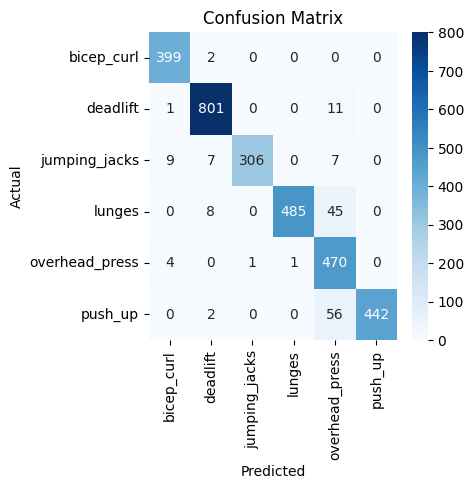

In [13]:
# Evaluate the model on the test set
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)  # Convert predictions to class labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(train_df['class_name']), yticklabels=np.unique(train_df['class_name']))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# # Evaluate the model on the test set
# predictions = model.predict(X_test)
# y_pred = np.argmax(predictions, axis=1)  # Convert predictions to class labels

# # Generate confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Print confusion matrix
# print("Confusion Matrix:")
# print(cm)

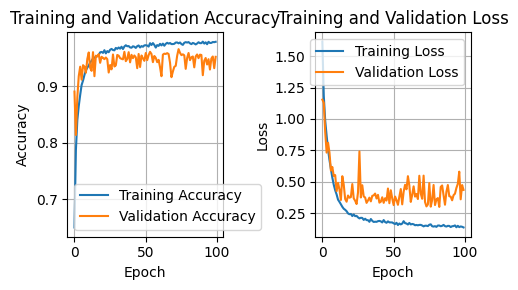

In [15]:
# Extracting training history for accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting accuracy horizontally
plt.figure(figsize=(5, 3))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Extracting training history for loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting loss horizontally
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


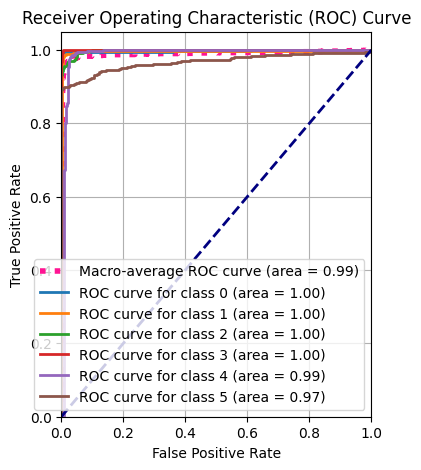

In [16]:
# Convert y_test to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=np.unique(y_test))

# Get predicted probabilities for X_test
y_probs = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_one_hot.ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot macro-average ROC curve
plt.figure(figsize=(4, 5))
plt.plot(fpr["micro"], tpr["micro"], label=f'Macro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)

# Add individual ROC curves for each class
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │         4,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 555,060 (2.12 MB)

 Trainable params: 184,358 (720.15 KB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 368,718 (1.41 MB)

## **Testing w/ Neural Network**

In [22]:
with open('neural_network.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('neural_network.pkl', 'rb') as f:
    model = pickle.load(f)

c:\Users\Renzo\miniconda3\envs\pd\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 24 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
# Load the pre-trained model
with open('neural_network.pkl', 'rb') as f:
    model = pickle.load(f)

# Check if model has class_names attribute
if hasattr(model, 'class_names'):
    class_names = model.class_names
else:
    # If class_names are not directly stored in the model, set them manually or handle the error
    class_names = ['barbel_bicep', 'deadlift', 'jumpjacks', 'lunges', 'overhead', 'pushup', 'stand']  # Replace with your actual class names

cap = cv2.VideoCapture(0)
emotions = []
warnings.filterwarnings('ignore')

# Initialize MediaPipe Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        

        # Make Detections
        results = holistic.process(image)

        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Draw pose landmarks
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

            try:
                # Extract pose landmarks
                pose = results.pose_landmarks.landmark
                pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

                # Make Detections
                X = pd.DataFrame([pose_row])
                body_language_prob = model.predict(X)[0]  # Get probabilities
                body_language_class_index = np.argmax(body_language_prob)  # Get the index of the highest probability
                body_language_class = class_names[body_language_class_index]  # Get the class name
                emotions.append(body_language_class)
                print(body_language_class, body_language_prob)

                # Get status box
                cv2.rectangle(image, (0, 0), (250, 60), (245, 117, 16), -1)

                # Display Class
                cv2.putText(image, 'CLASS', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, body_language_class, (90, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

                # Display Probability
                cv2.putText(image, 'PROB', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(round(np.max(body_language_prob), 2)), (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            except Exception as e:
                print(f"Error: {e}")

        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
deadlift [2.2294401e-01 7.7200621e-01 1.7667613e-03 5.8729114e-04 2.2439233e-03
 4.5191252e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
deadlift [6.3311234e-02 9.3373096e-01 1.2817244e-03 2.6289394e-04 1.1663159e-03
 2.4684242e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
deadlift [2.21142024e-02 9.76039767e-01 9.22305917e-04 1.17895324e-04
 6.80102035e-04 1.25790568e-04]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
deadlift [1.1644079e-02 9.8698682e-01 7.0888520e-04 6.6486093e-05 5.1238295e-04
 8.1424048e-05]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
deadlift [6.3380399e-03 9.9260241e-01 5.6955661e-04 3.8957747e-05 3.9315841e-04
 5.7844441e-05]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
deadlift [7.177457e-03 9.916938e-01 5.986830e-04 4.344524e-05 4.239965e-04
 6.266391e-05]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
deadlift [1.0440793e-02 9.8813409e-01 7.3156698e-04 6.4593252e-05 5.4257491e-04
 8.6468142e-05]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
deadlift [1.34558575e-0

## **Save Model**

In [18]:
model.save(r"C:\Users\Renzo\Documents\Final Design\model95%.h5")

In [19]:
model.save(r"C:\Users\Renzo\Documents\Final Design\model95%.keras")

In [20]:
# Assuming best_model is a TensorFlow model
model_json = model.to_json()
with open(r"C:\Users\Renzo\Documents\Final Design\model95%.json", 'w') as json_file:
    json_file.write(model_json)

print('Best model architecture and weights saved successfully.')

Best model architecture and weights saved successfully.


In [21]:
# Specify the file path where you want to save the pickle file
file_path = r"C:\Users\Renzo\Documents\Final Design\model95%.pkl"

# Save the best_model using pickle
with open(file_path, 'wb') as pickle_file:
    pickle.dump(model, pickle_file)

print(f'Best model saved to {file_path}')

Best model saved to C:\Users\Renzo\Documents\Final Design\model95%.pkl


## **TEST CODE (HYPERTUNE)**